In [175]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [176]:
# definicao de funcoes utilitarias... TODO: colocar em um arquivo utilitario .py

def print_dataframe_info(df):
    #print(str(df.info()) + '\n')
    print('SHAPE: ' + str(df.shape) + '\n')
    print('DTYPES: ' + str(df.dtypes) + '\n')
    print('#' * 100)
    print(str(df.head(5)) + '\n')
    print('#' * 100)
    print(str(df.tail(5)))


In [177]:
df_original = pd.read_csv('../data/fundo01-cotas-rendafixa.csv', header=0, encoding='iso-8859-1')
df_original.head(5)

,Código,Fundo,Data,Cota,Variação,Captação,Resgate,PL,Cotistas
0,16689,101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...,27/09/2018,"1,94912523","-0,02%","R$ 0,00","R$ 0,00","R$ 1.092.046,09",1
1,16689,101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...,26/09/2018,"1,94957229","0,01%","R$ 0,00","R$ 1.909.295,48","R$ 1.092.296,56",1
2,16689,101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...,25/09/2018,"1,94943552","0,01%","R$ 0,00","R$ 0,00","R$ 3.001.381,47",2
3,16689,101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...,24/09/2018,"1,94926787","0,01%","R$ 0,00","R$ 0,00","R$ 3.001.123,36",2
4,16689,101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...,21/09/2018,"1,94910034","0,01%","R$ 0,00","R$ 0,00","R$ 3.000.865,43",2


In [178]:
print("Descricao basica do dataframe original e seu conteudo: \n")
print_dataframe_info(df_original)

Descricao basica do dataframe original e seu conteudo: 

SHAPE: (1854, 9)

DTYPES: Código       int64
Fundo       object
Data        object
Cota        object
Variação    object
Captação    object
Resgate     object
PL          object
Cotistas     int64
dtype: object

####################################################################################################
   Código                                              Fundo        Data  \
0   16689  101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...  27/09/2018   
1   16689  101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...  26/09/2018   
2   16689  101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...  25/09/2018   
3   16689  101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...  24/09/2018   
4   16689  101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...  21/09/2018   

         Cota Variação Captação          Resgate               PL  Cotistas  
0  1,94912523   -0,02%  R$ 0,00          R$ 0,00  R$ 1.092.046,09         1  
1  1,94957229    

In [179]:
df2 = df_original.drop('Código', axis=1)
df2 = df2.drop('Fundo', axis=1)
df2 = df2.drop('Variação', axis=1)
df2 = df2.drop('Captação', axis=1)
df2 = df2.drop('Resgate', axis=1)
df2 = df2.drop('PL', axis=1)
df2 = df2.drop('Cotistas', axis=1)

In [180]:
print("Descricao do dataframe apos remover as colunas: \n")
print_dataframe_info(df2)

Descricao do dataframe apos remover as colunas: 

SHAPE: (1854, 2)

DTYPES: Data    object
Cota    object
dtype: object

####################################################################################################
         Data        Cota
0  27/09/2018  1,94912523
1  26/09/2018  1,94957229
2  25/09/2018  1,94943552
3  24/09/2018  1,94926787
4  21/09/2018  1,94910034

####################################################################################################
            Data        Cota
1849  20/05/2011  1,00198626
1850  19/05/2011   1,0014938
1851  18/05/2011  1,00099603
1852  17/05/2011  1,00049882
1853  16/05/2011           1


In [181]:
df2['Data'] = pd.to_datetime(df2['Data'], format='%d/%m/%Y')
df2.index = df2['Data']
del df2['Data']

In [182]:
print("Descricao do dataframe apos converter as datas:")
print_dataframe_info(df2)

Descricao do dataframe apos converter as datas:
SHAPE: (1854, 1)

DTYPES: Cota    object
dtype: object

####################################################################################################
                  Cota
Data                  
2018-09-27  1,94912523
2018-09-26  1,94957229
2018-09-25  1,94943552
2018-09-24  1,94926787
2018-09-21  1,94910034

####################################################################################################
                  Cota
Data                  
2011-05-20  1,00198626
2011-05-19   1,0014938
2011-05-18  1,00099603
2011-05-17  1,00049882
2011-05-16           1


In [183]:
df2['Cota'] = df2['Cota'].apply(lambda x: float(x.replace(',', '.')))
df2['Cota'] = df2['Cota'].astype(float)

In [184]:
print("Descricao do dataframe apos o processamento do valor da Cota:")
print_dataframe_info(df2)

Descricao do dataframe apos o processamento do valor da Cota:
SHAPE: (1854, 1)

DTYPES: Cota    float64
dtype: object

####################################################################################################
                Cota
Data                
2018-09-27  1.949125
2018-09-26  1.949572
2018-09-25  1.949436
2018-09-24  1.949268
2018-09-21  1.949100

####################################################################################################
                Cota
Data                
2011-05-20  1.001986
2011-05-19  1.001494
2011-05-18  1.000996
2011-05-17  1.000499
2011-05-16  1.000000


In [186]:
#df2 = df2.sort_values('Data')
df2 = df2.resample('D').ffill() # esse comando jah executa o sort

print("Descricao do dataframe apos preencher as datas que faltam: \n")
print_dataframe_info(df2)

Descricao do dataframe apos preencher as datas que faltam: 

SHAPE: (2692, 1)

DTYPES: Cota    float64
dtype: object

####################################################################################################
                Cota
Data                
2011-05-16  1.000000
2011-05-17  1.000499
2011-05-18  1.000996
2011-05-19  1.001494
2011-05-20  1.001986

####################################################################################################
                Cota
Data                
2018-09-23  1.949100
2018-09-24  1.949268
2018-09-25  1.949436
2018-09-26  1.949572
2018-09-27  1.949125


In [187]:
print(df2['2011-01-01':'2012-01-01'])

                Cota
Data                
2011-05-16  1.000000
2011-05-17  1.000499
2011-05-18  1.000996
2011-05-19  1.001494
2011-05-20  1.001986
2011-05-21  1.001986
2011-05-22  1.001986
2011-05-23  1.002484
2011-05-24  1.002984
2011-05-25  1.003480
2011-05-26  1.003984
2011-05-27  1.004439
2011-05-28  1.004439
2011-05-29  1.004439
2011-05-30  1.004947
2011-05-31  1.005441
2011-06-01  1.005942
2011-06-02  1.006441
2011-06-03  1.006947
2011-06-04  1.006947
2011-06-05  1.006947
2011-06-06  1.007445
2011-06-07  1.007674
2011-06-08  1.008183
2011-06-09  1.008692
2011-06-10  1.009205
2011-06-11  1.009205
2011-06-12  1.009205
2011-06-13  1.009719
2011-06-14  1.010235
...              ...
2011-12-03  1.068437
2011-12-04  1.068437
2011-12-05  1.068928
2011-12-06  1.069407
2011-12-07  1.069900
2011-12-08  1.070391
2011-12-09  1.070883
2011-12-10  1.070883
2011-12-11  1.070883
2011-12-12  1.071376
2011-12-13  1.071867
2011-12-14  1.072335
2011-12-15  1.072802
2011-12-16  1.073269
2011-12-17  1

Text(0.5,0,'Ano')

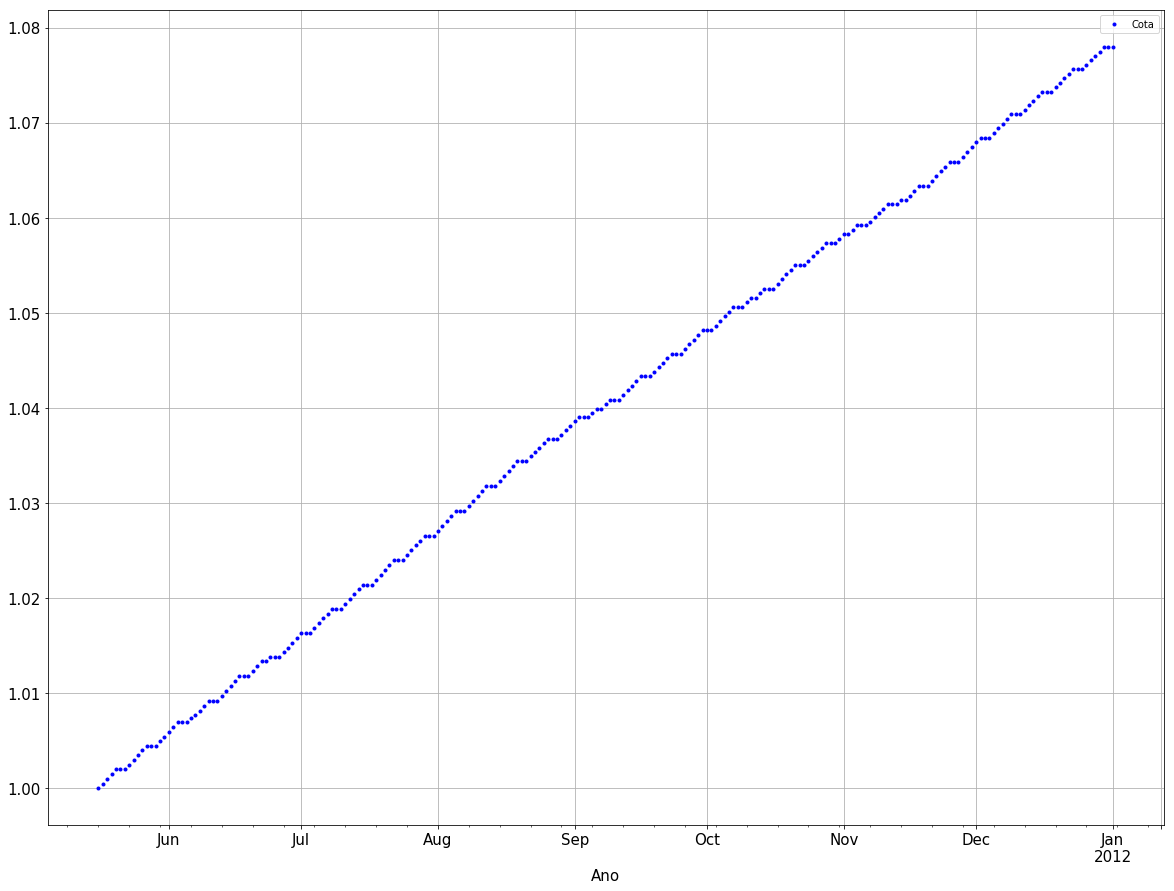

In [188]:
df2['2011-01-01':'2012-01-01'].plot(figsize=(20, 15), linewidth=2, fontsize=15, style='b.')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)

Text(0.5,0,'Ano')

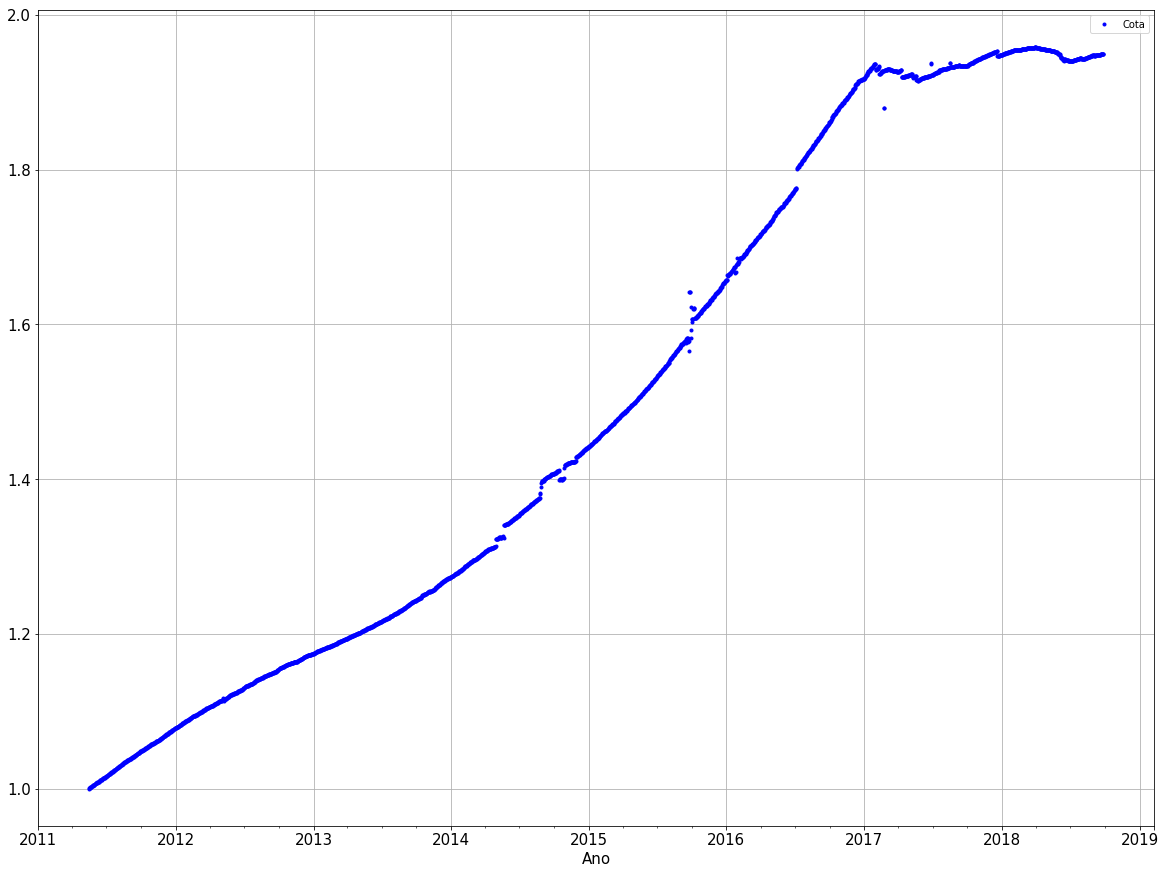

In [189]:
df2.plot(figsize=(20, 15), linewidth=2, fontsize=15, style='b.')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)

In [190]:
df3 = df2.resample('M')
df3 = df3.mean()

In [191]:
print("Descricao do dataframe com valores mensais:")
print_dataframe_info(df3)

Descricao do dataframe com valores mensais:
SHAPE: (89, 1)

DTYPES: Cota    float64
dtype: object

####################################################################################################
                Cota
Data                
2011-05-31  1.002849
2011-06-30  1.010794
2011-07-31  1.021438
2011-08-31  1.032847
2011-09-30  1.042921

####################################################################################################
                Cota
Data                
2018-05-31  1.953070
2018-06-30  1.943187
2018-07-31  1.942140
2018-08-31  1.945046
2018-09-30  1.948308


Text(0.5,0,'Ano')

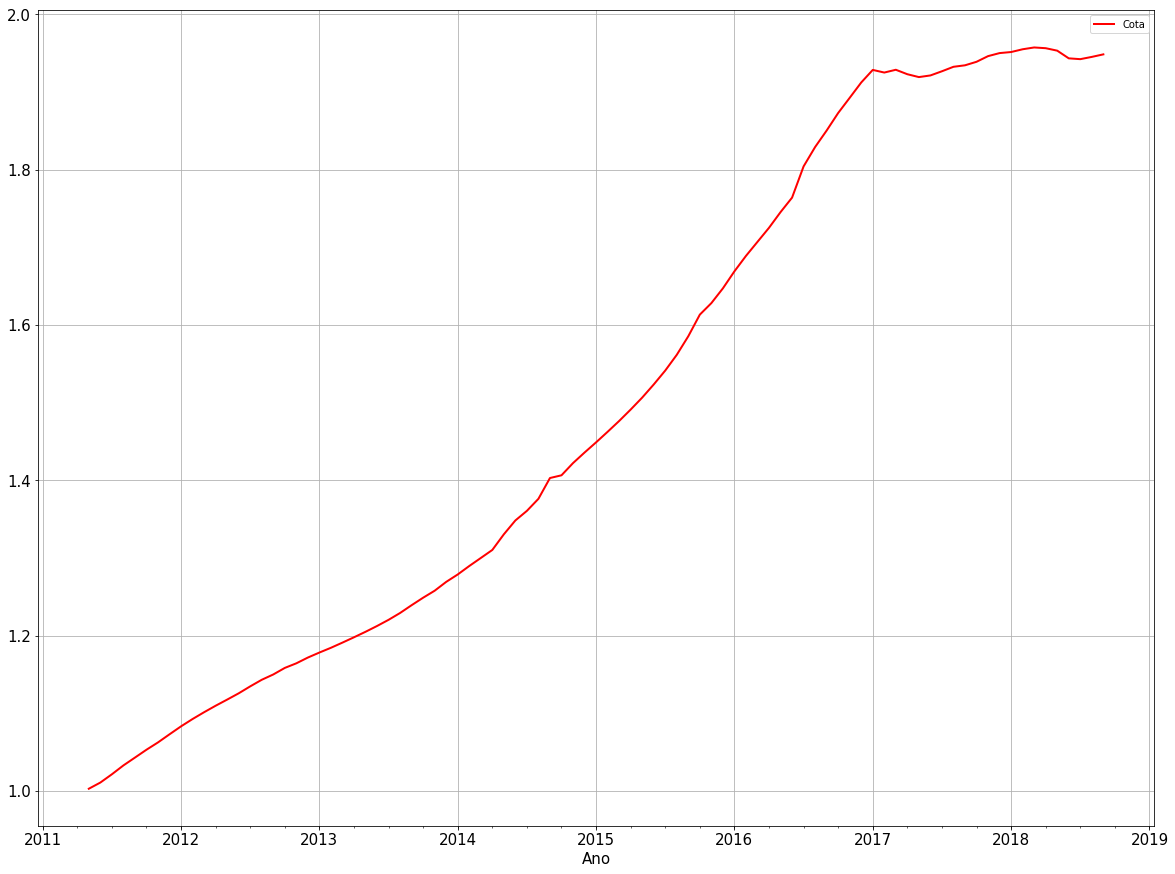

In [192]:
df3.plot(figsize=(20, 15), linewidth=2, fontsize=15, style='r-')
plt.grid(True)
plt.xlabel('Ano', fontsize=15)